<a href="https://colab.research.google.com/github/alfiejn19/ChallengeTelecomX-Parte1-/blob/main/ChallengeTelecomX(Parte1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X

## 📖 Librerias

In [ ]:
#Aqui pondremos todas las librerias que se usarán en el challenge.

#Para el manejo de los datos.
import pandas as pd
import numpy as np

#Para visualizar los datos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 📌 1. Extracción de los datos.

### 1.1. Cargamos los datos.

In [ ]:
#Hacemos nuestro primer acercamiento al conjunto de datos para ver si podemos trabajar con ellos.
archivo_telecomx = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df_telecom = pd.read_json(archivo_telecomx)
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 1.2. Pre-procesamos los datos.

**Observación:** Las columnas 'customer', 'phone', 'internet' y 'account' tienen diccionarios anidados, por lo que debemos normalizarlos dado que se trata de un archivo ".json".

In [ ]:
#Primero obtenemos un nuevo diccionario 'records' con nuestro DataFrame 'df_telecom' para poder normalizarlo.
#Guardamos el DataFrame normalizado en 'df_telecom_nz'.
df_telecom_nz = pd.json_normalize(df_telecom.to_dict('records'))

#Cambiamos el nombre de nuestras columnas al quitar los prefijos: 'customer.', 'phone.', 'internet.' y 'account.'
df_telecom_nz.columns = df_telecom_nz.columns.str.replace(r'^customer\.|^phone\.|^internet\.|^account\.', '', regex=True)
df_telecom_nz.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


> **IMPORTANTE:** Con nuesto pre-procesamiento obtuvimos el DataFrame **df_telecom_nz** y con el estamos listos para pasar al paso de 'transformación de los datos'.

## 🔧 2. Transformación de los datos.

### 2.1 Conociendo los datos.

In [ ]:
#Damos primero un vistazo a una muestra de los datos.
df_telecom_nz.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3431,4750-ZRXIU,Yes,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,360.1
501,0708-LGSMF,No,Male,0,Yes,No,13,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,65.85,902.25
3396,4707-MAXGU,No,Male,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.85,1872.2
5238,7140-ADSMJ,No,Male,0,No,No,8,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,162.3
7072,9739-JLPQJ,No,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1


Para trabajar con los datos, contamos con el siguiente diccionario para conocer mejor los datos.

**Diccionario de datos:**

|N°|Columna.        |Tipo      |Descripción                                    |
|---|----------------|----------|-----------------------------------------------|  
|1 |customerID      |Categórica|Número de identificación único de cada cliente.|
|2 |Churn(Objetivo) |Categórica|Si el cliente dejó o no la empresa.            |
|3 |gender          |Categórica|Género (masculino y femenino).                 |
|4 |SeniorCitizen   |Categórica|Información sobre si un cliente es mayor a 65 |
|  |                |          |años o no.                                     |
|5 |Partner         |Categórica|Si el cliente tiene o no una pareja.           |
|6 |Dependents      |Categórica|Si el cliente tiene o no dependientes.         |
|7 |tenure          |Continua  |Meses de contrato del cliente.                 |
|8 |PhoneService    |Categórica|Suscripción al servicio telefónico.            |
|9 |MultipleLines   |Categórica|Suscripción a más de una línea telefónica.     |
|10|InternetService |Categórica|Suscripción a un proveedor de internet.        |
|11|OnlineSecurity  |Categórica|Suscripción adicional de seguridad en línea.   |
|12|OnlineBackup    |Categórica|Suscripción adicional de respaldo en línea.    |
|13|DeviceProtection|Categórica|Suscripción adicional de protección del        |
|  |                |          |dispositivo.                                   |
|14|TechSupport     |Categórica|Suscripción adicional de soporte técnico,      |
|  |                |          |menor tiempo de espera.                        |
|15|StreamingTV     |Categórica|Suscripción de televisión por cable.           |
|16|StreamingMovies |Categórica|Suscripción de streaming de películas.         |
|17|Contract        |Categórica|Tipo de contrato.                              |
|18|PaperlessBilling|Categórica|Si el cliente prefiere recibir la factura en   |
|  |                |          |línea.                                         |
|19|PaymentMethod   |Categórica|Forma de pago.                                 |
|20|Charges.Monthly |Continua  |Total de todos los servicios del cliente por   |
|  |                |          |mes.                                           |
|21|Charges.Total   |Continua. |Total gastado por el cliente.                  |

**Observaciones:**
- Tenemos 21 columnas (variables):
  - 1 columna (Churn) es nuestro objetivo.
  - 3 columnas contienen datos de tipo continuo (tenure, Charges.Monthly, Charges.Total).
  - 20 columnas contienen datos de tipo categórico.
  - 1 columna (customerID) puede ser descartada pues solo identifica a cada cliente pero no agrega información.


In [ ]:
#Veamos la información y tipos de datos con los que trabajamos.
df_telecom_nz.info()
df_telecom_nz.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


> **Nota:** La columna "Charges.Total" tiene como tipo object y debería ser float64.

### 2.2. Buscando incoherencia en los datos.

Vamos a buscar las incoherencias mas comunes que podemos encontrar en los datos como: valores duplicados, valores vacíos, valores nulos, consistencia y validez de datos categóricos, valores atípicos, etc...

#### 2.2.1. Checamos si hay valores duplicados.

In [ ]:
#Contamos si hay datos duplicados.
duplicados=df_telecom_nz.duplicated().sum()
print(f'Cantidad de datos duplicados:{duplicados}')

Cantidad de datos duplicados:0


> No contamos con datos duplicados.

#### 2.2.2. Checamos si hay valores vacíos.

In [ ]:
vacios=df_telecom_nz.isna().sum()
print(f'Cantidad de datos nulos:{vacios}')

Cantidad de datos nulos:customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


#### 2.2.3. Checamos si hay valores nulos.  

In [ ]:
nulos=df_telecom_nz.isnull().sum()
print(f'Cantidad de datos nulos:{nulos}')

Cantidad de datos nulos:customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


#### 2.2.4. Checamos strings vacíos.

> En el caso de que existan, hacemos el cambio por "NaN".

In [ ]:
#Hacemos la verificación en cada columna.
for columna in df_telecom_nz.columns:
  contador=(df_telecom_nz[columna]=='').sum()
  print(f'{columna}: {contador}')

customerID: 0
Churn: 224
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
Charges.Monthly: 0
Charges.Total: 0


In [ ]:
#Verificamos de nuevo la columna 'Charges.Total' (Ahora con doble espacio).
(df_telecom_nz['Charges.Total']==' ').sum()

np.int64(11)

> Las columnas **'Churn'** y **'Charges.Total'** tienen strings vacías, por lo que hacemos el reemplazo por NaN.

In [ ]:
#Hacemos el remplazo, cada columna por individual.
df_telecom_nz['Churn']=df_telecom_nz['Churn'].replace('', np.nan)
df_telecom_nz['Charges.Total']=df_telecom_nz['Charges.Total'].replace(' ', np.nan)

In [ ]:
#Verificamos los cambios realizados en las columnas.
(df_telecom_nz['Churn']=='').sum()
(df_telecom_nz['Charges.Total']==' ').sum()

np.int64(0)

> **Importante:** Eliminaremos y guardaremos en una variable extra aquellos de la columna 'Churn' que son datos nulos. Los datos de 'Charges.Total' los eliminaremos pues solo son 11 registros.

In [ ]:
#Eliminamos los datos nulos de 'Charges.Total'.
df_telecom_nz=df_telecom_nz.dropna(subset=['Charges.Total'])
#Guardamoos en una variable extra los datos nulos de 'Churn' y los eliminamos.
df_churn_nulos=df_telecom_nz[df_telecom_nz['Churn'].isnull()]
df_telecom_nz=df_telecom_nz.dropna(subset=['Churn'])
#Verificamos los cambios.
df_telecom_nz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

#### 2.2.5 Checamos los tipos de datos.

In [ ]:
#Observamos el data set.
df_telecom_nz.sample(5)
df_telecom_nz.to_csv('telecom.csv', index=False)

In [ ]:
#Como observamos en una nota, debemos cambiar el tipo de dato de 'Charges.Total' de object a float.
df_telecom_nz['Charges.Total']=df_telecom_nz['Charges.Total'].astype(float)

## 🧷 3. Creando la columna 'Cuenta_Diaria'.

> Antes de crear la columna, cambiamos los nombres de las columnas a español para tener mas coherencia en nuestro análisis.

In [ ]:
#Renombramos las columnas.
df_telecom_nz.rename(columns={'customerID': 'Cliente_ID',
                              'Churn': 'Churn',
                              'gender': 'Genero',
                              'SeniorCitizen': 'Jubilado',
                              'Partner': 'Pareja',
                              'Dependents': 'Dependientes',
                              'tenure': 'Meses_Contrato',
                              'PhoneService': 'Servicio_Telefono',
                              'MultipleLines': 'Lineas_Multiples',
                              'InternetService': 'Servicio_Internet',
                              'OnlineSecurity': 'Seguridad_Online',
                              'OnlineBackup': 'Copia_Online',
                              'DeviceProtection': 'Proteccion_Dispositivo',
                              'TechSupport': 'Soporte_Tecnico',
                              'StreamingTV': 'Streaming_TV',
                              'StreamingMovies': 'Streaming_Peliculas',
                              'Contract': 'Tipo_Contrato',
                              'PaperlessBilling': 'Facturacion_Electronica',
                              'PaymentMethod': 'Metodo_Pago',
                              'Charges.Monthly': 'Cuenta_Mensual',
                              'Charges.Total': 'Cuenta_Total'}, inplace=True)
#Verificamos los cambios.
df_telecom_nz.sample(5)

,Cliente_ID,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Copia_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Cuenta_Mensual,Cuenta_Total
1766,2511-ALLCS,No,Female,0,Yes,Yes,35,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.30,821.60
6192,8495-LJDFO,No,Female,1,No,No,64,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.95,7111.30
1027,1444-VVSGW,Yes,Male,0,Yes,No,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85
2369,3312-UUMZW,No,Male,0,Yes,No,32,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.85,3145.90
1810,2580-ASVVY,No,Female,0,Yes,No,37,No,No phone service,DSL,...,No,No,Yes,Yes,No,Two year,No,Electronic check,45.40,1593.10


In [ ]:
#Creamos la columna 'Cuentas_Diarias'
df_telecom_nz['Cuenta_Diaria']=df_telecom_nz['Cuenta_Mensual']/30
#Verificamos las columnas de cargos.
df_telecom_nz[['Meses_Contrato', 'Cuenta_Mensual', 'Cuenta_Total', 'Cuenta_Diaria']].sample(5)

,Meses_Contrato,Cuenta_Mensual,Cuenta_Total,Cuenta_Diaria
7011,18,24.65,471.35,0.821667
4100,4,19.95,68.20,0.665000
4198,72,84.45,6033.10,2.815000
3304,27,19.90,550.10,0.663333
4336,33,66.40,2245.40,2.213333


## 🧮 4. Estandarizamos los datos.

### 4.1. Veamos que columnas se pueden componer por 1 o 0.

In [ ]:
#Usamos un 'for' para ideintificar las columnas que buscamos.
for columna in df_telecom_nz.columns:
    print(columna)
    print(df_telecom_nz[columna].unique())
    print('*'*10)

Cliente_ID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
**********
Churn
['No' 'Yes']
**********
Genero
['Female' 'Male']
**********
Jubilado
[0 1]
**********
Pareja
['Yes' 'No']
**********
Dependientes
['Yes' 'No']
**********
Meses_Contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
**********
Servicio_Telefono
['Yes' 'No']
**********
Lineas_Multiples
['No' 'Yes' 'No phone service']
**********
Servicio_Internet
['DSL' 'Fiber optic' 'No']
**********
Seguridad_Online
['No' 'Yes' 'No internet service']
**********
Copia_Online
['Yes' 'No' 'No internet service']
**********
Proteccion_Dispositivo
['No' 'Yes' 'No internet service']
**********
Soporte_Tecnico
['Yes' 'No' 'No internet service']
**********
Streaming_TV
['Yes' 'No' 'No internet service']
**********
Streaming_Pelicul

> **Observamos:**
1. Las columnas 'Churn', 'Genero', 'Pareja', 'Dependientes', 'Servicio_Telefono' y 'Facturacion_Electronica' están listas para cambiar por 1(Yes) y 0(No).
2. La columna 'Jubilado' ya esta lista.
3. Podemos reemplazar "No internet service" por "No" en las columnas 'Seguridad_Online', 'Copia_Online', 'Proteccion_Dispositivo', 'Soporte Tecnico', 'Streaming_TV' y 'Streaming_Peliculas' pues es claro que si en la columna 'Servicio_Internet' tienen "No" en estas también lo tendrán.
4. Podemos reemplazar "No phone service" por "No" en las columna 'Lineas_Multiples' pues es claro que si en la columna 'Servicio_Telefono' tienen "No" en estas también lo tendrán.


In [ ]:
#Tratamos las columnas binarias.
#La columna 'Genero' la tratamos aparte.
df_telecom_nz[['Churn',
               'Pareja',
               'Dependientes',
               'Servicio_Telefono',
               'Facturacion_Electronica']]=df_telecom_nz[['Churn',
                                                          'Pareja',
                                                          'Dependientes',
                                                          'Servicio_Telefono',
                                                          'Facturacion_Electronica']].replace({'Yes':1, 'No':0})

df_telecom_nz['Genero']=df_telecom_nz['Genero'].replace({'Female':0, 'Male':1})
df_telecom_nz.sample(5)

/tmp/ipython-input-379399250.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Facturacion_Electronica']].replace({'Yes':1, 'No':0})
/tmp/ipython-input-379399250.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_nz['Genero']=df_telecom_nz['Genero'].replace({'Female':0, 'Male':1})


,Cliente_ID,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Cuenta_Mensual,Cuenta_Total,Cuenta_Diaria
3419,4735-ASGMA,1,1,0,0,0,26,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.35,2515.30,3.278333
1686,2387-KDZQY,0,1,0,0,0,17,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,20.10,279.50,0.670000
1413,2038-LLMLM,0,0,0,0,0,48,1,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,103.85,4946.05,3.461667
2827,3920-HIHMQ,0,0,0,0,1,26,1,Yes,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,49.50,1265.65,1.650000
837,1193-RTSLK,1,0,0,0,0,38,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Credit card (automatic),83.90,3233.60,2.796667


In [ ]:
#Tratamos las columnas que dependen de 'Servicio_Internet'.
df_telecom_nz[['Seguridad_Online',
               'Copia_Online',
               'Proteccion_Dispositivo',
               'Soporte_Tecnico',
               'Streaming_TV',
               'Streaming_Peliculas']]=df_telecom_nz[['Seguridad_Online',
                                                          'Copia_Online',
                                                          'Proteccion_Dispositivo',
                                                          'Soporte_Tecnico',
                                                          'Streaming_TV',
                                                          'Streaming_Peliculas']].replace({'Yes':1, 'No':0, 'No internet service':0})

#Tratamos 'Lineas_Multiples' ya que depende de 'Servicio_Telefono'.
df_telecom_nz['Lineas_Multiples']=df_telecom_nz['Lineas_Multiples'].replace({'Yes':1, 'No':0, 'No phone service':0})
df_telecom_nz.sample(5)

/tmp/ipython-input-1831956874.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Streaming_Peliculas']].replace({'Yes':1, 'No':0, 'No internet service':0})
/tmp/ipython-input-1831956874.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_nz['Lineas_Multiples']=df_telecom_nz['Lineas_Multiples'].replace({'Yes':1, 'No':0, 'No phone service':0})


,Cliente_ID,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,Cuenta_Mensual,Cuenta_Total,Cuenta_Diaria
6540,8990-YOZLV,0,0,0,0,0,69,1,1,DSL,...,0,1,0,0,Two year,1,Mailed check,66.90,4577.90,2.230000
4350,5968-XQIVE,0,1,0,1,1,72,1,1,Fiber optic,...,0,0,1,0,One year,1,Electronic check,89.70,6588.95,2.990000
4572,6261-RCVNS,1,0,0,0,0,42,1,0,DSL,...,1,1,0,1,One year,0,Credit card (automatic),73.90,3160.55,2.463333
1165,1658-XUHBX,0,0,1,1,1,59,1,1,Fiber optic,...,1,0,0,1,Month-to-month,1,Credit card (automatic),88.75,5348.65,2.958333
6806,9388-ZEYVT,0,1,0,0,0,43,0,0,DSL,...,1,1,0,1,One year,0,Electronic check,44.15,1931.30,1.471667


### 4.2. Tratamos las otras columnas con dummies.

> Las columnas a tratar con dummies son: 'Servicio_Internet', 'Tipo_Contrato'y 'Metodo_Pago'.

In [ ]:
#Primero creamos las dummies para las columnas mencionadas.
df_telecom_nz=pd.get_dummies(df_telecom_nz, columns=['Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'])
#Cambiamos los nombres de las nuevas columnas.
df_telecom_nz.rename(columns={'Servicio_Internet_DSL': 'Servicio_Internet_DSL',
                              'Servicio_Internet_Fiber optic': 'Servicio_Internet_Fibra_Optica',
                              'Servicio_Internet_No': 'No_Servicio_Internet',
                              'Tipo_Contrato_Month-to-month': 'Tipo_Contrato_Mensual',
                              'Tipo_Contrato_One year': 'Tipo_Contrato_Anual',
                              'Tipo_Contrato_Two year': 'Tipo_Contrato_Dos_Anos',
                              'Metodo_Pago_Bank transfer (automatic)': 'Metodo_Pago_Transferencia_Bancaria(A)',
                              'Metodo_Pago_Credit card (automatic)': 'Metodo_Pago_Tarjeta_Credito(A)',
                              'Metodo_Pago_Electronic check': 'Metodo_Pago_Cheque_Electronico(A)', 'Metodo_Pago_Mailed check': 'Metodo_Pago_Cheque_Mensajeria'}, inplace=True)
#Verificamos los cambios.
df_telecom_nz.sample(5)

,Cliente_ID,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,...,Servicio_Internet_DSL,Servicio_Internet_Fibra_Optica,No_Servicio_Internet,Tipo_Contrato_Mensual,Tipo_Contrato_Anual,Tipo_Contrato_Dos_Anos,Metodo_Pago_Transferencia_Bancaria(A),Metodo_Pago_Tarjeta_Credito(A),Metodo_Pago_Cheque_Electronico(A),Metodo_Pago_Cheque_Mensajeria
1667,2364-UFROM,0,1,0,0,0,30,1,0,1,...,True,False,False,False,True,False,False,False,True,False
4420,6050-FFXES,0,0,0,1,0,69,1,1,0,...,False,True,False,False,False,True,True,False,False,False
3523,4854-CIDCF,0,0,1,0,0,3,1,0,0,...,False,True,False,True,False,False,False,False,True,False
6508,8945-GRKHX,1,0,0,0,1,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
4953,6766-HFKLA,0,0,0,1,0,56,1,1,0,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
#El dataset quedo de con las siguientes columnas:
df_telecom_nz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Cliente_ID                             7032 non-null   object 
 1   Churn                                  7032 non-null   int64  
 2   Genero                                 7032 non-null   int64  
 3   Jubilado                               7032 non-null   int64  
 4   Pareja                                 7032 non-null   int64  
 5   Dependientes                           7032 non-null   int64  
 6   Meses_Contrato                         7032 non-null   int64  
 7   Servicio_Telefono                      7032 non-null   int64  
 8   Lineas_Multiples                       7032 non-null   int64  
 9   Seguridad_Online                       7032 non-null   int64  
 10  Copia_Online                           7032 non-null   int64  
 11  Proteccio

## 📊 5.Carga y análisis.

### 5.1. Análisis descriptivo.

In [ ]:
#Observamos la descripción de los datos.
df_telecom_nz.describe()

,Churn,Genero,Jubilado,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Copia_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cuenta_Mensual,Cuenta_Total,Cuenta_Diaria
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


### 5.2. Distribución de evasión.

In [ ]:
#Veamos como estan distribuidos los datos 'Churn'.
churn_dt=df_telecom_nz['Churn'].value_counts()
churn_dt

,count
Churn,
0,5163
1,1869


> Recordemos que 0(Permanece) y 1(Abandono).

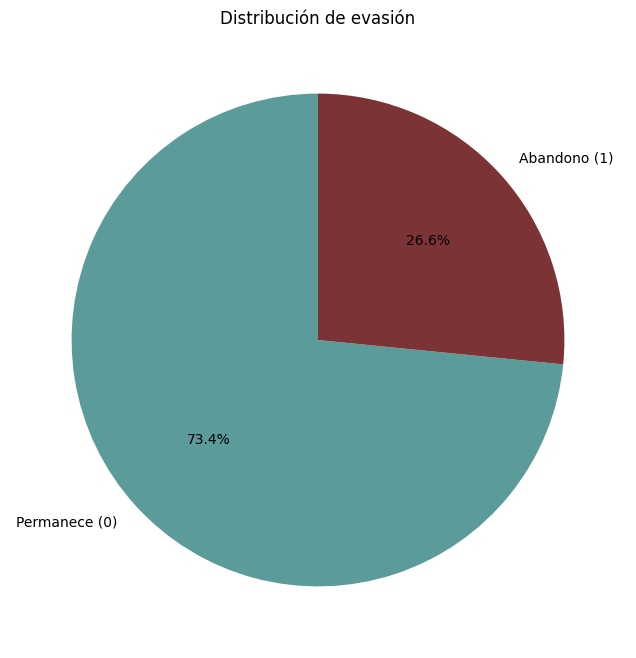

<Figure size 640x480 with 0 Axes>

In [ ]:
#Veamos de manera visual el como están desbalanceados estos datos:
plt.figure(figsize=(8, 8))
plt.pie(churn_dt, labels=['Permanece (0)', 'Abandono (1)'], autopct='%1.1f%%', startangle=90, colors=['#5B9B9A', '#7B3336'])
plt.title('Distribución de evasión')
plt.show()
plt.savefig('tasa_global_de_abandono.png')

>**Nota:** Nuestro objetivo es llegar a una conclusión sobre el por que 26.6% de los clientes abandono, para esto veremos su correlación con las demás variables.

### 5.3. Distribución de evasión por variables.

#### 5.3.1. Distribución de evasión por variables binarias.

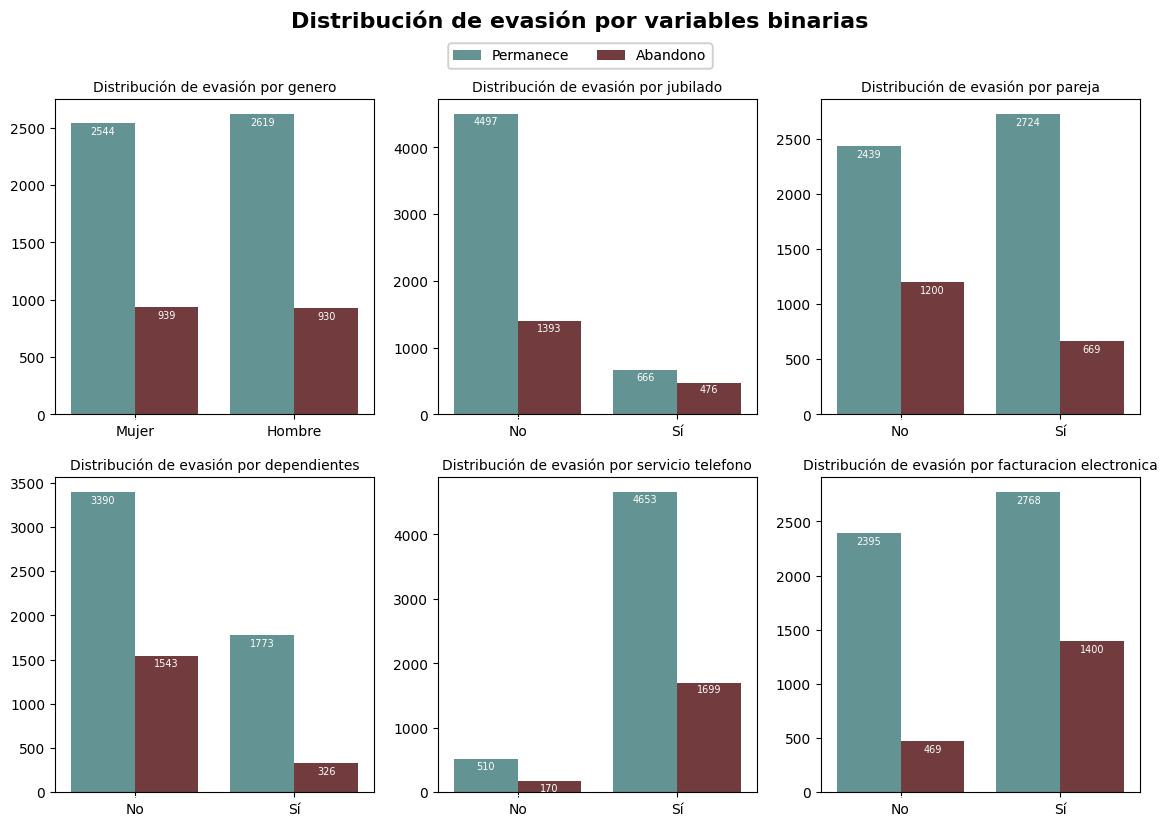

<Figure size 640x480 with 0 Axes>

In [ ]:
#Creamos la gráfica para observar la distribución.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
axes=axes.flatten()
colors=['#5B9B9A', '#7B3336']

etiquetas={'Genero': ['Mujer', 'Hombre'],
           'Jubilado': ['No', 'Sí'],
           'Pareja': ['No', 'Sí'],
           'Dependientes': ['No', 'Sí'],
           'Servicio_Telefono': ['No', 'Sí'],
           'Facturacion_Electronica': ['No', 'Sí']}

for i, columna in enumerate(['Genero', 'Jubilado', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Facturacion_Electronica']):
    ax = axes[i]
    sns.countplot(data=df_telecom_nz, x=columna, hue='Churn', ax=ax, palette=colors)
    ax.set_title(f'Distribución de evasión por {columna.replace("_", " ").lower()}', fontsize=10)
    fig.legend(['Permanece', 'Abandono'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(etiquetas[columna])
    ax.legend().remove()

    for p in ax.patches:
        altura=p.get_height()
        ax.text(p.get_x() + p.get_width()/2., altura - 30,
                '{:1.0f}'.format(altura),
                ha="center", va="top", color='white', fontsize=7)

plt.suptitle('Distribución de evasión por variables binarias', fontsize=16, weight='bold', ha='center')

plt.show()
plt.savefig('distribucion_binaria.png')

#### 5.3.2. Distribución de evasión por variables categóricas.

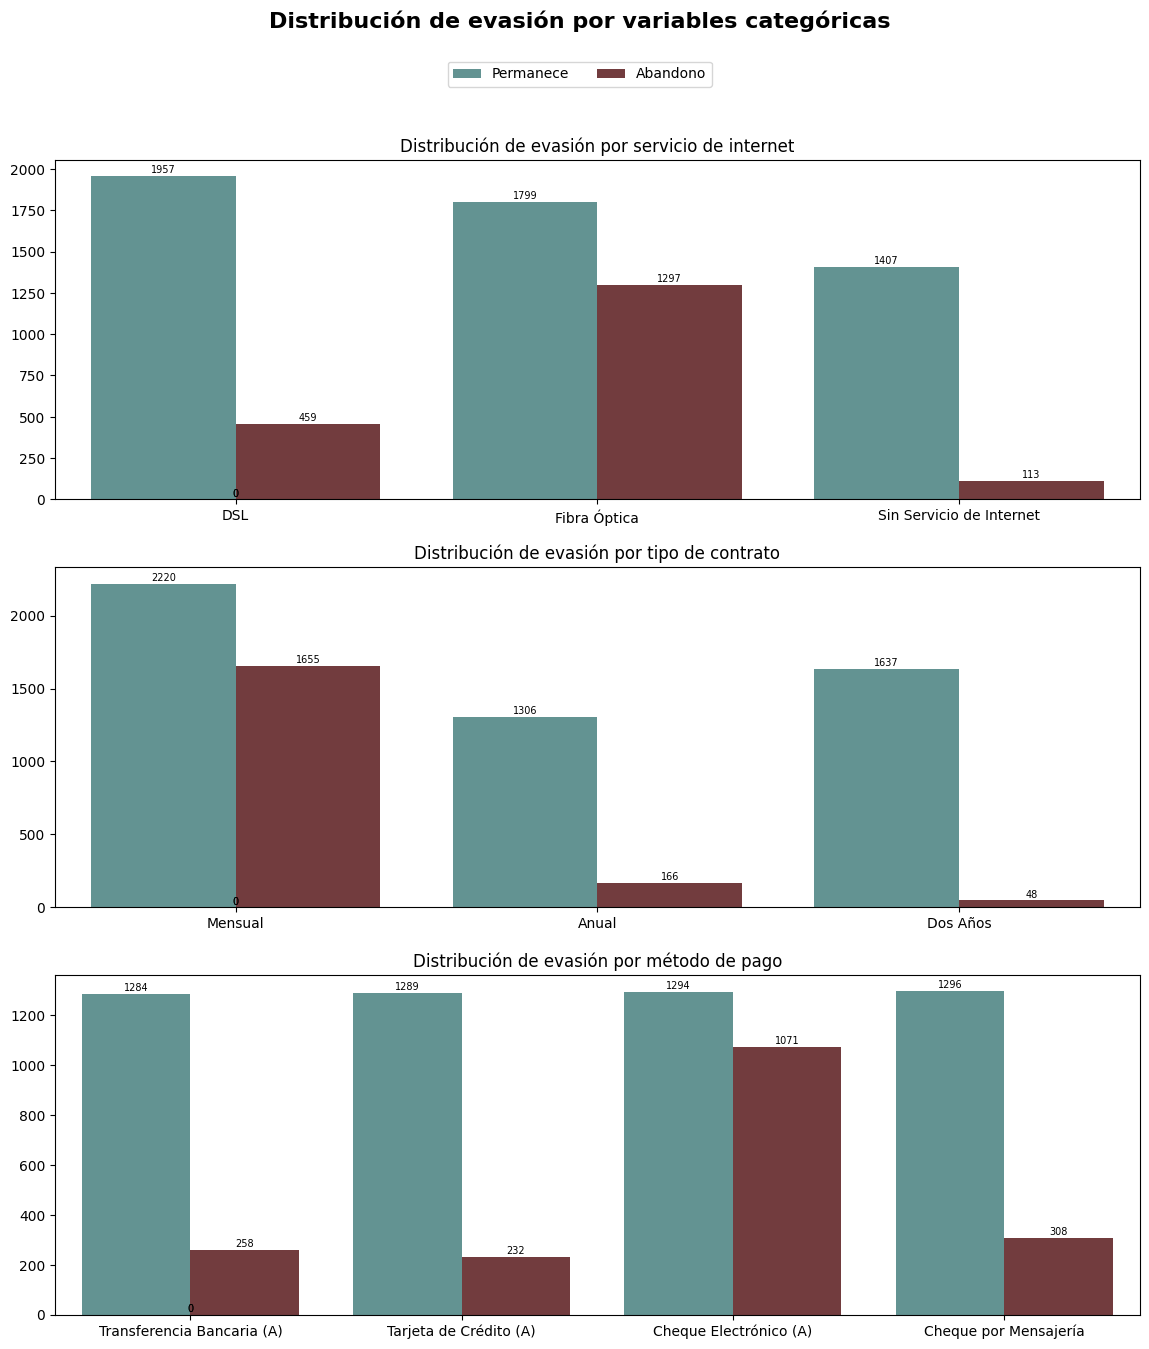

<Figure size 640x480 with 0 Axes>

In [ ]:
#Definimos los grupos de columnas para visualizar
columnas={'Servicio de Internet': ['Servicio_Internet_DSL',
                                    'Servicio_Internet_Fibra_Optica',
                                    'No_Servicio_Internet'],
          'Tipo de Contrato': ['Tipo_Contrato_Mensual',
                               'Tipo_Contrato_Anual',
                               'Tipo_Contrato_Dos_Anos'],
          'Método de Pago': ['Metodo_Pago_Transferencia_Bancaria(A)',
                             'Metodo_Pago_Tarjeta_Credito(A)',
                             'Metodo_Pago_Cheque_Electronico(A)',
                             'Metodo_Pago_Cheque_Mensajeria']}

etiquetas={'Servicio_Internet_DSL': 'DSL',
           'Servicio_Internet_Fibra_Optica': 'Fibra Óptica',
           'No_Servicio_Internet': 'Sin Servicio de Internet',
           'Tipo_Contrato_Mensual': 'Mensual',
           'Tipo_Contrato_Anual': 'Anual',
           'Tipo_Contrato_Dos_Anos': 'Dos Años',
           'Metodo_Pago_Transferencia_Bancaria(A)': 'Transferencia Bancaria (A)',
           'Metodo_Pago_Tarjeta_Credito(A)': 'Tarjeta de Crédito (A)',
           'Metodo_Pago_Cheque_Electronico(A)': 'Cheque Electrónico (A)',
           'Metodo_Pago_Cheque_Mensajeria': 'Cheque por Mensajería'}

fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(14, 15))
axes=axes.flatten()
colors = ['#5B9B9A', '#7B3336']

for i, (nombre_categoria, columna) in enumerate(columnas.items()):
    ax = axes[i]
    df_col=df_telecom_nz.melt(id_vars='Churn', value_vars=columna, var_name=nombre_categoria, value_name='Valor')
    df_col=df_col[df_col['Valor'] == True]
    sns.countplot(data=df_col, x=nombre_categoria, hue='Churn', ax=ax, palette=colors)
    ax.set_title(f'Distribución de evasión por {nombre_categoria.lower()}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(range(len(columna)))
    ax.set_xticklabels([etiquetas[col] for col in columna], ha='center')
    ax.legend().remove()

    for p in ax.patches:
        altura=p.get_height()
        ax.text(p.get_x() + p.get_width()/2., altura + 5,
                '{:1.0f}'.format(altura),
                ha="center", va="bottom", color='black', fontsize=7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Permanece', 'Abandono'], loc='upper center', bbox_to_anchor=(0.5, .95), ncol=2)
plt.suptitle('Distribución de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')

plt.show()
plt.savefig('distribucion_categorica.png')

#### 5.3.4. Distribución de evasión por sub-servicio contratado.

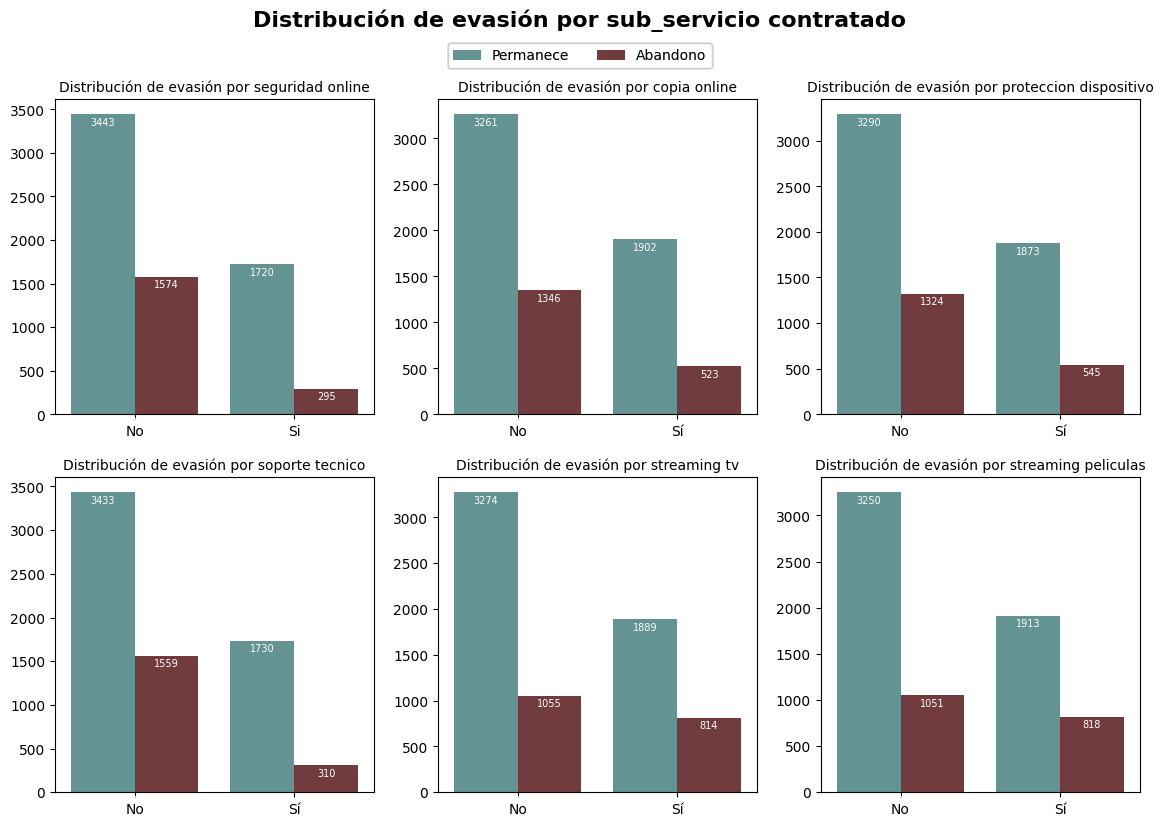

<Figure size 640x480 with 0 Axes>

In [ ]:
#Creamos la gráfica para observar la distribución.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
axes=axes.flatten()
colors=['#5B9B9A', '#7B3336']

etiquetas={'Seguridad_Online': ['No', 'Si'],
           'Copia_Online': ['No', 'Sí'],
           'Proteccion_Dispositivo': ['No', 'Sí'],
           'Soporte_Tecnico': ['No', 'Sí'],
           'Streaming_TV': ['No', 'Sí'],
           'Streaming_Peliculas': ['No', 'Sí']}

for i, columna in enumerate(['Seguridad_Online', 'Copia_Online', 'Proteccion_Dispositivo',
                             'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']):
    ax = axes[i]
    sns.countplot(data=df_telecom_nz, x=columna, hue='Churn', ax=ax, palette=colors)
    ax.set_title(f'Distribución de evasión por {columna.replace("_", " ").lower()}', fontsize=10)
    fig.legend(['Permanece', 'Abandono'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(etiquetas[columna])
    ax.legend().remove()

    for p in ax.patches:
        altura=p.get_height()
        ax.text(p.get_x() + p.get_width()/2., altura - 30,
                '{:1.0f}'.format(altura),
                ha="center", va="top", color='white', fontsize=7)

plt.suptitle('Distribución de evasión por sub_servicio contratado', fontsize=16, weight='bold', ha='center')

plt.show()
plt.savefig('distribucion_sservicio.png')

#### 5.3.5. Distribución de evasión por variables númericas.

/tmp/ipython-input-2695534646.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_nz, x='Churn', y=columna, ax=axes[i*2+1], palette=colors, legend=False)
/tmp/ipython-input-2695534646.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_nz, x='Churn', y=columna, ax=axes[i*2+1], palette=colors, legend=False)
/tmp/ipython-input-2695534646.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_nz, x='Churn', y=columna, ax=axes[i*2+1], palette=colors, legend=False)
/tmp/ipython-input-2695534646.py:1

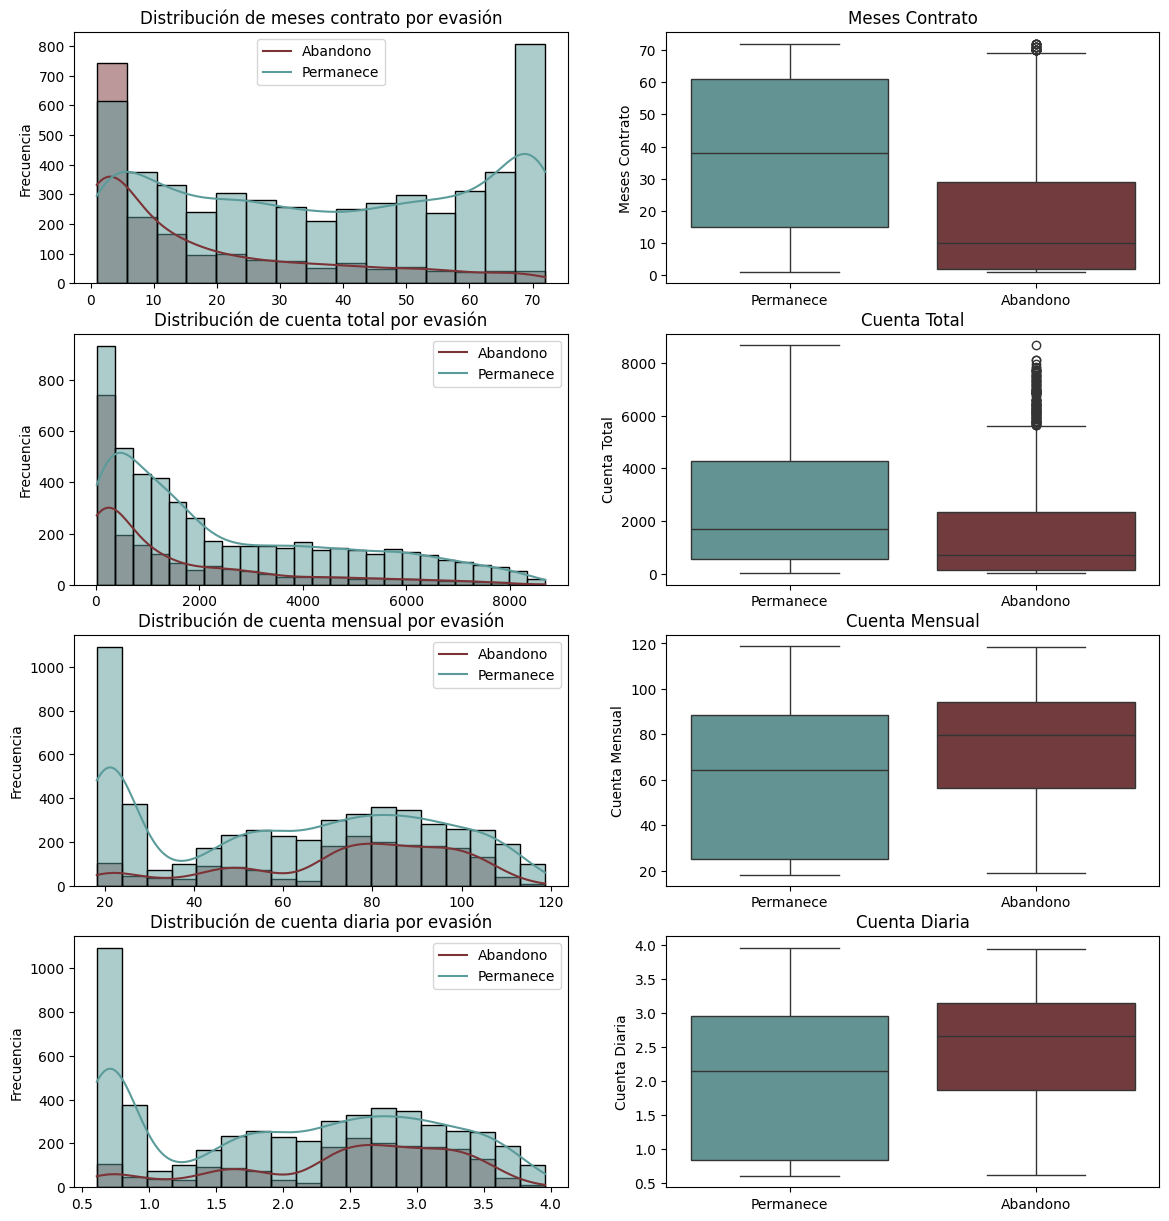

<Figure size 640x480 with 0 Axes>

In [ ]:
#Graficamos el histograma y un diagrama de caja por cada variable númerica.
variables_numericas = ['Meses_Contrato', 'Cuenta_Total', 'Cuenta_Mensual', 'Cuenta_Diaria']

fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(14, 15))
axes = axes.flatten()
colors = ['#5B9B9A', '#7B3336']

for i, columna in enumerate(variables_numericas):
    #Histograma.
    sns.histplot(data=df_telecom_nz, x=columna, hue='Churn', ax=axes[i*2], palette=colors, kde=True)
    axes[i*2].set_title(f'Distribución de {columna.replace("_", " ").lower()} por evasión')
    axes[i*2].set_xlabel('')
    axes[i*2].set_ylabel('Frecuencia')
    axes[i*2].legend(['Abandono', 'Permanece'])

    #Diagrama de caja.
    sns.boxplot(data=df_telecom_nz, x='Churn', y=columna, ax=axes[i*2+1], palette=colors, legend=False)
    axes[i*2+1].set_title(f'{columna.replace("_", " ")}')
    axes[i*2+1].set_xlabel('')
    axes[i*2+1].set_ylabel(columna.replace("_", " "))
    # Establecer las ubicaciones de las marcas del eje x explícitamente
    axes[i*2+1].set_xticks([0, 1])
    axes[i*2+1].set_xticklabels(['Permanece', 'Abandono'])

plt.show()
plt.savefig('distribucion_numerica.png')

## 🎯 6. Informe final.

### 🔷 Introducción.

Identificar los factores determinantes del abandono de clientes (churn) en **Telecom X**, con el fin de desarrollar estrategias efectivas de retención que reduzcan la tasa actual del **26.6%**.

> Problema de Evasión (Churn): **1 de cada 4 clientes** abandona la empresa, impactando significativamente en la rentabilidad.

### 🔷 Limpieza y Tratamiento de Datos.

Pasos realizados:
1. Importación de datos.
  + Tratamos los diccionarios anidados.
  + Conocimos los datos (Columna, tipo y descripción)
2. Incoherencias de datos.
  + Tratamos los datos con strings vacíos.
  + Eliminamos los datus nulos.
  + Tratamos las categorías de algunas variables.
  + Estandarizamos algunas columnas.
  + Aplicamos dummies a otras columnas.

### 🔷 Análisis Exploratorio de Datos (EDA).

**Principales hallazgos:**

#### 1. Tasa global de evasión.


Abandono:--->   26.6%  ████████▌  
Permanece:->  73.4%  ████████████████████  

> La tasa de abandono supera el 20%, esto representa un fcator preocupante para la empresa.

#### 2. Factores de servicio.

**Internet:**
+ Fibra Óptica:
  + 459 abandonos   →   Bajo riesgo  
+ DSL:
  + 1,497 abandonos →   Riesgo medio  
+ Sin Internet:
  + 1,957 abandonos →   ALTO RIESGO  

**Servicios digitales:**
+ Seguridad Online:  
   + Sin servicio: 3,443 abandonos  
   + Con servicio: 295 abandonos  (↓91.4%)

+ Streaming TV:  
   + Sin servicio: más de 3,000 abandonos  
   + Con servicio: menos de 500 abandonos



#### 3. Perfil demográfico:

+ Género y estado civil:
  + Hombres solteros: 3,819 abandonos → Mayor riesgo  
  + Mujeres en pareja: 1,240 permanecen → Mayor fidelidad

#### 4. Factores contractuales.

+ Duración de contrato:
  + Mensual: 45% de abandonos  
  + 2 años: 12% de abandonos  

+ Facturación.
  + Clientes con facturas <$50 abandonas 3 veces más.

### 🔷 Conclusiones e Insights.

+ Servicios Digitales como Ancla:
  + La seguridad online reduce el churn en 91.4%.
  + El streaming disminuye abandonos en >85%.
+ Perfil de Alto Riesgo:
  + Hombres solteros menores de 45 años con contratos mensuales y sin servicios adicionales.
  + Clientes sin internet en su paquete (tasa de abandono 2.5 veces mayor).
+ Factores Protectores:
  + Contratos largos (2 años) reducen la tasa de abandono en 67% vs mensuales.
  + Jubilados y clientes en pareja muestran mayor lealtad.

+ Impacto en reducción de abandones:
Priorizar estrategias en los segmentos de riesgo podría reducir el abandono.

### 🔷 Recomendaciones estratégicas.

El análisis revela que la combinación de servicios digitales + contratos extendidos + segmentación demográfica es clave para reducir el abandono.

In [ ]:
df_telecom_nz.to_csv('df_telecom_nz.csv', index=False)